In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

False


In [2]:
# it is used to read image.csv file in abo-images-small data which has image id 
import pandas as pd
file_path = pd.read_csv('/kaggle/input/vr-miniproject-2/abo-images-small/images/metadata/images.csv')

In [3]:
# used to read all the metadata from listings and combine them to one as all_meta_data
import pandas as pd
import string

num_suffixes = list(map(str, range(10)))
alpha_suffixes = list(string.ascii_lowercase[:6])
suffixes = num_suffixes + alpha_suffixes

meta_data_list = []

for suffix in suffixes:
    path = f'/kaggle/input/vr-miniproject-2/abo-listings/listings/metadata/listings_{suffix}.json'
    df = pd.read_json(path, lines=True)
    df.rename(columns={'main_image_id': 'image_id'}, inplace=True)
    meta_data_list.append(df)

all_meta_data = pd.concat(meta_data_list, ignore_index=True)

In [4]:
# used to create rows for all image_ids and other_image_ids as image_ids so that each image_id is recordered as different (has multiple data)
import pandas as pd

df = pd.DataFrame(all_meta_data)

def combine_ids(row): 
    other_ids = row['other_image_id']
    # other_image_id is taken as list as it contains image ids
    if isinstance(other_ids, list):
        return [row['image_id']] + other_ids
    else:
        return [row['image_id']]

df['combined_image_ids'] = df.apply(combine_ids, axis=1)

df_exploded = df.explode('combined_image_ids').reset_index(drop=True)

df_exploded['image_id'] = df_exploded['combined_image_ids']

df_exploded.drop(columns=['combined_image_ids'], inplace=True)

print(df_exploded)


                                                    brand  \
0           [{'language_tag': 'nl_NL', 'value': 'find.'}]   
1           [{'language_tag': 'nl_NL', 'value': 'find.'}]   
2           [{'language_tag': 'nl_NL', 'value': 'find.'}]   
3           [{'language_tag': 'nl_NL', 'value': 'find.'}]   
4       [{'language_tag': 'es_MX', 'value': 'AmazonBas...   
...                                                   ...   
711223      [{'language_tag': 'en_CA', 'value': 'find.'}]   
711224      [{'language_tag': 'en_CA', 'value': 'find.'}]   
711225      [{'language_tag': 'en_CA', 'value': 'find.'}]   
711226      [{'language_tag': 'en_CA', 'value': 'find.'}]   
711227      [{'language_tag': 'en_CA', 'value': 'find.'}]   

                                             bullet_point  \
0       [{'language_tag': 'nl_NL', 'value': 'Schoen in...   
1       [{'language_tag': 'nl_NL', 'value': 'Schoen in...   
2       [{'language_tag': 'nl_NL', 'value': 'Schoen in...   
3       [{'language_tag

In [8]:
# to check that image_ids are changed properly
df_exploded["image_id"]

0         81iZlv3bjpL
1         91mIRxgziUL
2         91eqBkW06wL
3         A1BHZSKNbkL
4         619y9YG9cnL
             ...     
711223    81fnxlzmiYL
711224    81YNklsz4dL
711225    A1+VHY23fgL
711226    913lKMbp7OL
711227    91Tl-bK1vvL
Name: image_id, Length: 711228, dtype: object

In [5]:
# changed here we are taking from duplicated rows the one which has most data i.e which has max non-NaN columns
tdf = df_exploded
#tdf = tdf.drop_duplicates(subset='image_id', keep='first')  # 'first' keeps the first occurrence, 'last' keeps the last
tdf = tdf.loc[tdf.isna().sum(axis=1).groupby(tdf['image_id']).idxmin()]

# Display the updated DataFrame
print(tdf)

                                                    brand  \
581401        [{'language_tag': 'it_IT', 'value': 'UMI'}]   
457442        [{'language_tag': 'it_IT', 'value': 'UMI'}]   
271559        [{'language_tag': 'es_ES', 'value': 'UMI'}]   
620522        [{'language_tag': 'es_ES', 'value': 'UMI'}]   
624642     [{'language_tag': 'en_US', 'value': 'Solimo'}]   
...                                                   ...   
572022      [{'language_tag': 'en_US', 'value': 'Rivet'}]   
294706  [{'language_tag': 'es_ES', 'value': 'Stone & B...   
197017  [{'language_tag': 'en_US', 'value': 'Stone & B...   
22216   [{'language_tag': 'en_US', 'value': 'Stone & B...   
143002  [{'language_tag': 'en_US', 'value': 'Stone & B...   

                                             bullet_point  \
581401                                                NaN   
457442                                                NaN   
271559                                                NaN   
620522                 

In [6]:
final_merged = pd.merge(file_path, tdf, on='image_id', how='left')

In [71]:
df = final_merged

In [72]:
import os
image_folder = '/kaggle/input/vr-miniproject-2/abo-images-small/images/small/'
df['path'] = df['path'].apply(lambda p: os.path.join(image_folder, p))

In [73]:
df.columns

Index(['image_id', 'height', 'width', 'path', 'brand', 'bullet_point', 'color',
       'item_id', 'item_name', 'model_name', 'model_number', 'model_year',
       'product_type', 'style', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'item_dimensions', 'item_weight',
       'material', 'fabric_type', 'color_code', 'product_description',
       'spin_id', '3dmodel_id', 'pattern', 'finish_type', 'item_shape'],
      dtype='object')

In [12]:
print(df.head())

      image_id  height  width  \
0  010-mllS7JL     106    106   
1  01dkn0Gyx0L     122    122   
2  01sUPg0387L     111    111   
3  1168jc-5r1L     186    186   
4  11RUV5Fs65L      30    500   

                                                path  \
0  /kaggle/input/vr-miniproject-2/abo-images-smal...   
1  /kaggle/input/vr-miniproject-2/abo-images-smal...   
2  /kaggle/input/vr-miniproject-2/abo-images-smal...   
3  /kaggle/input/vr-miniproject-2/abo-images-smal...   
4  /kaggle/input/vr-miniproject-2/abo-images-smal...   

                                            brand  \
0     [{'language_tag': 'it_IT', 'value': 'UMI'}]   
1     [{'language_tag': 'it_IT', 'value': 'UMI'}]   
2     [{'language_tag': 'es_ES', 'value': 'UMI'}]   
3     [{'language_tag': 'es_ES', 'value': 'UMI'}]   
4  [{'language_tag': 'en_US', 'value': 'Solimo'}]   

                                        bullet_point color     item_id  \
0                                                NaN   NaN  B07Y7M8LV7 

In [74]:
# one can change number of columns by mentioning below (before i assumed we need to generate only 1 question so there were less columns) you can add more columns by seeing the above output
# chagne in the api code: add the column values which u are taking
df = df[["image_id","height","width","path","color","item_name","brand","item_keywords", "product_type","material","fabric_type","pattern","product_description", "item_shape","color"]]

In [ ]:
# one need to change here the indexes take a gap of 1000
# iss range ke under images ke subset bana lena (aur please index file mai sahi se store karna)
# ... : 0 - 1L 
# ... : 1L - 2L
# ... : 2L - 3L
subset_df = df.loc[200000:201001]

In [ ]:
# can change n if u want
import base64
import os
import requests
from tqdm import tqdm
import time
import random
import pandas as pd

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
API_KEY = user_secrets.get_secret("GEMINI_API_KEY_1")

questions_list = []
answers_list = []

N = 1000
max_retries = 6
retry_delay = 10

for idx, row in tqdm(subset_df.head(N).iterrows(), total=N):
    # in these u need to add the columns which u have added in df
    image_path = row['path']
    item_keywords = row['item_keywords']
    item_name = row['item_name']
    product_type = row['product_type']
    material = row['material']
    fabric_type = row['fabric_type']
    pattern = row['pattern']
    product_description = row['product_description']
    item_shape = row['item_shape']
    color = row['color']
    height = row['height']
    brand= row['brand']
    width = row['width']

    time.sleep(10)

    attempt = 0
    while attempt < max_retries:
        try:
            with open(image_path, "rb") as image_file:
                image_base64 = base64.b64encode(image_file.read()).decode("utf-8")

            
            prompt_text = (
                f"Given this product image and its metadata:\n"
                f"- Item Name: {item_name}\n"
                f"- Keywords: {item_keywords}\n"
                f"- Product Type: {product_type}\n"
                f"- Material: {material}\n"
                f"- Fabric Type: {fabric_type}\n"
                f"- Pattern: {pattern}\n"
                f"- Description: {product_description}\n"
                f"- Brand: {brand}\n"
                f"- Shape: {item_shape}\n"
                f"- Color: {color}\n\n"
                f"Generate between 3 and 7 high-quality question-answer pairs that are suitable for training a BLIP (Bootstrapped Language-Image Pretraining) model on Amazon-style e-commerce data.\n\n"
                f"Important constraints:\n"
                f"1. The answer to each question must be a single English word.\n"
                f"2. Avoid yes/no, true/false, subjective, or numerical questions (e.g., price, size, quantity).\n"
                f"3. Focus on visual or descriptive aspects (e.g., shape, texture, color, pattern, type, material, visible design features).\n"
                f"4. If metadata is missing, rely solely on the image to generate relevant and grounded questions.\n\n"
                f"Output format:\n"
                f"Each line should contain one question and its answer, separated by ' / '. For example:\n"
                f"What is the main color of the item? / Red\n"
                f"What kind of pattern does the item have? / Striped"
            )
            
            prompt = {
                "contents": [{
                    "parts": [
                        {"text": prompt_text},
                        {
                            "inline_data": {
                                "mime_type": "image/jpeg",
                                "data": image_base64
                            }
                        }
                    ]
                }]
            }

            url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={API_KEY}"
            headers = {"Content-Type": "application/json"}
            response = requests.post(url, headers=headers, json=prompt)
            response_json = response.json()

            if "candidates" in response_json:
                output_text = response_json["candidates"][0]["content"]["parts"][0]["text"]
                break
            elif "error" in response_json:
                error_msg = response_json['error']['message']
                if "overloaded" in error_msg.lower():
                    attempt += 1
                    if attempt < max_retries:
                        print(f"Model overloaded. Retrying... Attempt {attempt} of {max_retries}")
                        time.sleep(random.uniform(30, 50))
                        continue
                    else:
                        output_text = f"API Error: {error_msg} (Max retries reached)"
                else:
                    output_text = f"API Error: {error_msg}"
                break
            else:
                output_text = "Unexpected response format"
                break

        except requests.exceptions.RequestException as e:
            output_text = f"Request Error: {str(e)}"
            attempt += 1
            if attempt < max_retries:
                print(f"Retrying... Attempt {attempt} of {max_retries}.")
                time.sleep(random.uniform(50, 80))
            else:
                output_text = "Max retries reached. Skipping."
        except Exception as e:
            output_text = f"Exception: {str(e)}"
            break

    # Parse and extract Q/A
    q_list = []
    a_list = []
    if "/" in output_text and "API Error" not in output_text and "Exception" not in output_text and "Unexpected" not in output_text:
        lines = output_text.strip().splitlines()
        for line in lines:
            if " / " in line:
                q, a = line.split(" / ")
                q_list.append(q.strip())
                a_list.append(a.strip())
    else:
        # Error or bad output, store empty lists
        q_list = []
        a_list = []

    questions_list.append(q_list)
    answers_list.append(a_list)
subset_df.loc[subset_df.head(N).index, "qa_questions"] = pd.Series(questions_list, index=subset_df.head(N).index)
subset_df.loc[subset_df.head(N).index, "qa_answers"] = pd.Series(answers_list, index=subset_df.head(N).index)
print(subset_df[["path", "qa_questions", "qa_answers"]].head(N))



 62%|██████▏   | 620/1000 [1:57:39<1:12:43, 11.48s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6


 62%|██████▏   | 621/1000 [2:00:05<5:27:41, 51.88s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6
Model overloaded. Retrying... Attempt 4 of 6
Model overloaded. Retrying... Attempt 5 of 6


 62%|██████▏   | 622/1000 [2:03:30<10:16:41, 97.89s/it]

Model overloaded. Retrying... Attempt 1 of 6


 62%|██████▎   | 625/1000 [2:04:42<4:51:33, 46.65s/it] 

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6
Model overloaded. Retrying... Attempt 4 of 6
Model overloaded. Retrying... Attempt 5 of 6


 63%|██████▎   | 629/1000 [2:08:54<4:14:17, 41.13s/it] 

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 63%|██████▎   | 630/1000 [2:10:30<5:55:47, 57.70s/it]

Model overloaded. Retrying... Attempt 1 of 6


 63%|██████▎   | 631/1000 [2:11:31<6:01:07, 58.72s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 63%|██████▎   | 632/1000 [2:13:14<7:20:18, 71.79s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6


 64%|██████▎   | 635/1000 [2:15:59<5:13:46, 51.58s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6
Model overloaded. Retrying... Attempt 4 of 6


 64%|██████▍   | 639/1000 [2:19:22<3:44:07, 37.25s/it]

Model overloaded. Retrying... Attempt 1 of 6


 64%|██████▍   | 643/1000 [2:20:54<2:13:16, 22.40s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 65%|██████▍   | 646/1000 [2:22:57<2:46:14, 28.18s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 65%|██████▍   | 647/1000 [2:24:30<4:40:58, 47.76s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6
Model overloaded. Retrying... Attempt 4 of 6
Model overloaded. Retrying... Attempt 5 of 6


 65%|██████▍   | 648/1000 [2:28:00<9:24:47, 96.27s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6


 65%|██████▍   | 649/1000 [2:30:08<10:20:17, 106.03s/it]

Model overloaded. Retrying... Attempt 1 of 6


 65%|██████▌   | 653/1000 [2:31:28<3:37:26, 37.60s/it]  

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 66%|██████▌   | 655/1000 [2:33:25<4:12:59, 44.00s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6
Model overloaded. Retrying... Attempt 4 of 6
Model overloaded. Retrying... Attempt 5 of 6


 66%|██████▌   | 656/1000 [2:36:53<8:55:31, 93.41s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6


 66%|██████▌   | 659/1000 [2:38:52<4:55:44, 52.04s/it]

Model overloaded. Retrying... Attempt 1 of 6
Model overloaded. Retrying... Attempt 2 of 6
Model overloaded. Retrying... Attempt 3 of 6


 66%|██████▌   | 659/1000 [2:40:19<1:22:57, 14.60s/it]


KeyboardInterrupt: 

In [79]:
# subset_df.loc[subset_df.head(659).index, "qa_questions"] = pd.Series(questions_list, index=subset_df.head(659).index)
# subset_df.loc[subset_df.head(659).index, "qa_answers"] = pd.Series(answers_list, index=subset_df.head(659).index)
# print(subset_df[["path", "qa_questions", "qa_answers"]].head(659))

                                                     path  \
200000  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200001  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200002  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200003  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200004  /kaggle/input/vr-miniproject-2/abo-images-smal...   
...                                                   ...   
200654  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200655  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200656  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200657  /kaggle/input/vr-miniproject-2/abo-images-smal...   
200658  /kaggle/input/vr-miniproject-2/abo-images-smal...   

                                             qa_questions  \
200000  [What is the object's material?, What shape ar...   
200001  [What is the chair's primary color?, What is t...   
200002  [What is the box’s border color?, What is the ...   
200003  [What is the co

/tmp/ipykernel_31/276769217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[subset_df.head(659).index, "qa_questions"] = pd.Series(questions_list, index=subset_df.head(659).index)
/tmp/ipykernel_31/276769217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[subset_df.head(659).index, "qa_answers"] = pd.Series(answers_list, index=subset_df.head(659).index)


In [82]:
# used to save csv file
qna = subset_df[["image_id","path","height","width", "qa_questions", "qa_answers"]]
qna.to_csv("qna_output_200000-201000.csv", index=False)

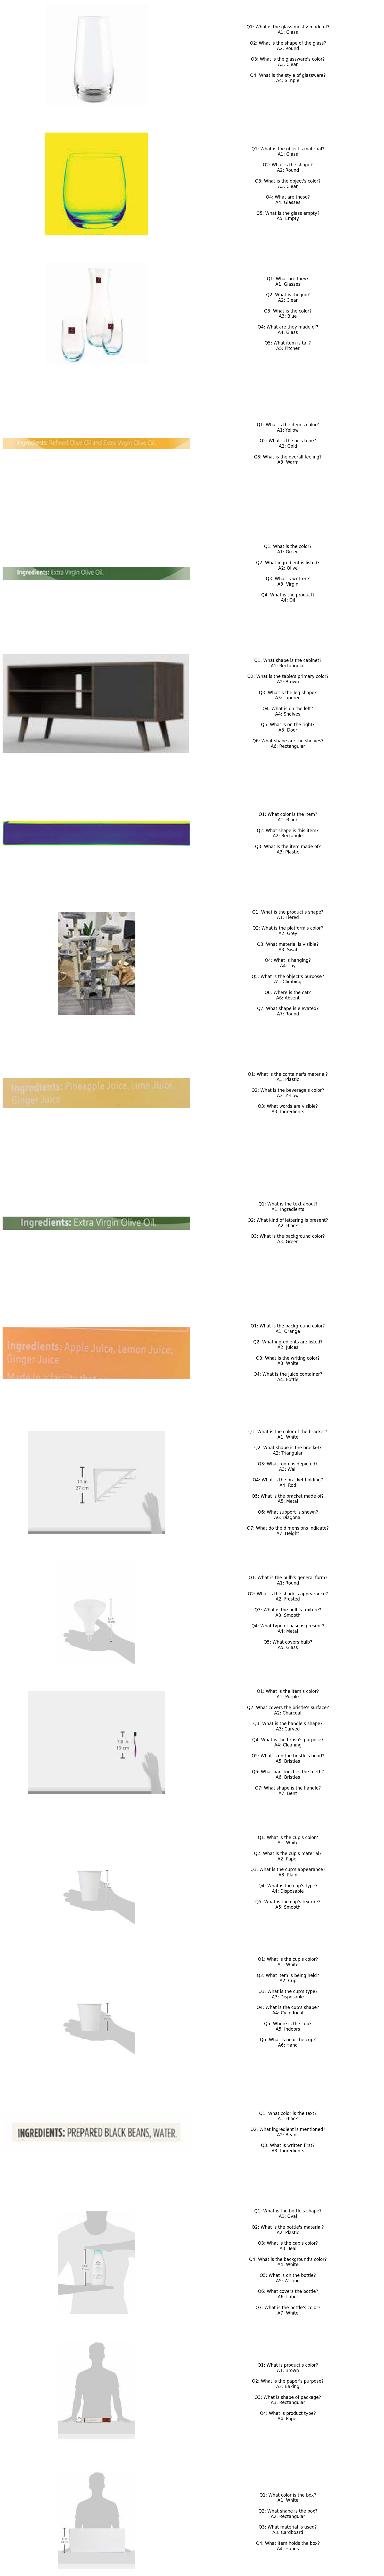

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Plot settings
fig, axs = plt.subplots(N, 2, figsize=(15, 5 * N))  # image + text
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(N):
    img = mpimg.imread(subset_df.iloc[i]['path'])  # Load image
    
    # Left side: image
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')

    # Right side: questions + answers
    axs[i, 1].axis('off')
    
    # Join question-answer pairs into a multiline string
    questions = subset_df.iloc[i]['qa_questions']
    answers = subset_df.iloc[i]['qa_answers']
    
    # Combine into formatted text
    qa_text = "\n\n".join([f"Q{i+1}: {q}\nA{i+1}: {a}" for i, (q, a) in enumerate(zip(questions, answers))])
    
    axs[i, 1].text(0.5, 0.5, qa_text, ha='center', va='center', wrap=True, fontsize=12, color='black')

plt.tight_layout()
plt.savefig("/kaggle/working/output.png", dpi=600)
plt.show()
